In [1]:
%less demos/dataset/vmstat_loadtest.log

In [2]:
import pandas as pd

raw = pd.read_csv("demos/dataset/vmstat_loadtest.log", skiprows=1)
raw.head()

,r b swpd free buff cache si so bi bo in cs us sy id wa st UTC
0,0 0 6144 2720868 41924 ...
1,0 0 6144 2718404 42276 ...
2,0 0 6144 2718404 42276 ...
3,0 0 6144 2717652 42276 ...
4,0 0 6144 2717652 42276 ...


In [20]:
columns = raw.columns.str.split().values[0]
print(columns)

['r', 'b', 'swpd', 'free', 'buff', 'cache', 'si', 'so', 'bi', 'bo', 'in', 'cs', 'us', 'sy', 'id', 'wa', 'st', 'UTC']


In [21]:
data = raw.iloc[:,0].str.split(n=len(columns)-1).apply(pd.Series)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,6144,2720868,41924,345548,0,0,29,691,588,541,2,4,93,1,0,2019-01-13 16:09:33
1,0,0,6144,2718404,42276,347908,0,0,1421,116,1789,7724,1,6,92,1,0,2019-01-13 16:09:34
2,0,0,6144,2718404,42276,347912,0,0,0,44,1853,7724,3,3,94,0,0,2019-01-13 16:09:35
3,0,0,6144,2717652,42276,347912,0,0,0,24,1778,7022,1,3,95,0,0,2019-01-13 16:09:36
4,0,0,6144,2717652,42276,347912,0,0,0,20,1753,7033,1,4,96,0,0,2019-01-13 16:09:37


In [22]:
data.columns = columns
data.head()

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st,UTC
0,0,0,6144,2720868,41924,345548,0,0,29,691,588,541,2,4,93,1,0,2019-01-13 16:09:33
1,0,0,6144,2718404,42276,347908,0,0,1421,116,1789,7724,1,6,92,1,0,2019-01-13 16:09:34
2,0,0,6144,2718404,42276,347912,0,0,0,44,1853,7724,3,3,94,0,0,2019-01-13 16:09:35
3,0,0,6144,2717652,42276,347912,0,0,0,24,1778,7022,1,3,95,0,0,2019-01-13 16:09:36
4,0,0,6144,2717652,42276,347912,0,0,0,20,1753,7033,1,4,96,0,0,2019-01-13 16:09:37


In [26]:
vmstat = data.iloc[:,:-1].apply(pd.to_numeric)
vmstat['UTC'] = pd.to_datetime(data['UTC'])
vmstat.head()

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st,UTC
0,0,0,6144,2720868,41924,345548,0,0,29,691,588,541,2,4,93,1,0,2019-01-13 16:09:33
1,0,0,6144,2718404,42276,347908,0,0,1421,116,1789,7724,1,6,92,1,0,2019-01-13 16:09:34
2,0,0,6144,2718404,42276,347912,0,0,0,44,1853,7724,3,3,94,0,0,2019-01-13 16:09:35
3,0,0,6144,2717652,42276,347912,0,0,0,24,1778,7022,1,3,95,0,0,2019-01-13 16:09:36
4,0,0,6144,2717652,42276,347912,0,0,0,20,1753,7033,1,4,96,0,0,2019-01-13 16:09:37


In [27]:
cpu = vmstat[['us','sy','id','wa', 'st']]
cpu.head()

,us,sy,id,wa,st
0,2,4,93,1,0
1,1,6,92,1,0
2,3,3,94,0,0
3,1,3,95,0,0
4,1,4,96,0,0


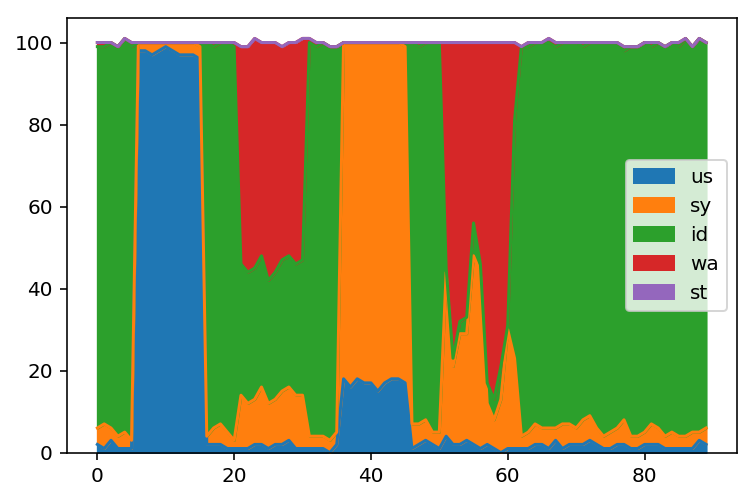

In [28]:
cpu.plot.area()